In [121]:
#importing pandas library

import pandas as pd

In [122]:
#using the dataset provided for predicting bitcoin price and checking the columns within it

bitcoin_ds = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')
bitcoin_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [123]:
#top 5 rows of dataset

bitcoin_ds.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2                      0                           1.0   
3                      0                           1.0   
4                      0                           1.0   

   btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                           0.0  ...                         31.781022   
1                           0.0  ...                        154.463801   
2                           0.0  ...                       1278.516635   
3                           0.0  ...                      22186.687990   
4                           0.0  ...                        689.179876   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                     241                 244   
1                       0.0                     234                 235   
2                       0.0                     185                 183   
3                       0.0                     224                 224   
4                       0.0                     218                 218   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                     41240                                   244   
1                     41475                                   235   
2                     41658                                   183   
3                     41882                                   224   
4                     42100                                   218   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                                244             65173.13   
1                                                235             18911.74   
2                                                183              9749.98   
3                                                224             11150.03   
4                                                218             12266.83   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                           36500.0                                   0.0  
1                            7413.0                                   0.0  
2                             700.0                                   0.0  
3                              50.0                                   0.0  
4                            1553.0                                   0.0  

[5 rows x 24 columns]

In [125]:
#inorder to find value of 1024 row of btc market price column

bitcoin_ds['btc_market_price'][1023]

13.6888

In [126]:
#importing seaborn and stats library

import seaborn as sns
import scipy.stats as stats

C:\Users\rauld\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


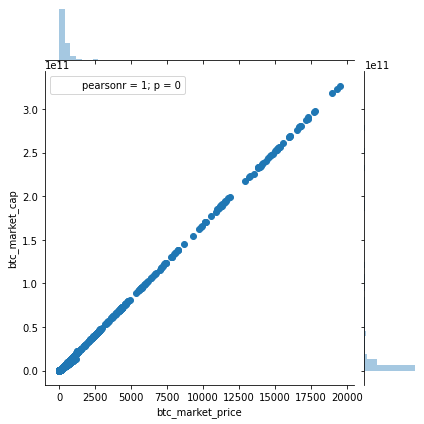

In [127]:
#Exploratory data analysis to find perfect correlation between variables

relation = sns.jointplot(data=bitcoin_ds,x='btc_market_price',y='btc_market_cap')
relation.annotate(stats.pearsonr)

In [128]:
#filling null values with the dataset with average of that particular column

bitcoin_ds.fillna(bitcoin_ds.mean(),inplace=True)

In [129]:
#using train test split method

X = bitcoin_ds[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction',
'btc_hash_rate','btc_difficulty','btc_cost_per_transaction_percent']]
y = bitcoin_ds['btc_market_price']

In [130]:
#importing necessary library for splitting as well as actual split in consecutive step

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [131]:
#importing and instantiation of linear regression model

from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()

In [132]:
#training the dataset

LRmodel.fit(X_train,y_train)

LinearRegression()

In [133]:
#testing the dataset for predicting values and storing the values in variable 'pred'

pred = LRmodel.predict(X_test)

In [134]:
#for finding mean squared error, import library and print to obtain the value

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))

361.4329080086916


In [135]:
#new value of various features which will determine bitcoin value

new_pred_value = [[1.940000e+11,193578,23654604.11,117.430262,2.250000e-05,2.527738e+00,154.463801]]
pred1 = LRmodel.predict(new_pred_value)

In [136]:
#bitcoin predicted value

pred1

array([11834.87578733])